In [23]:
#Author: Chambon Loick
'''
Desc: Visualize the computational graph
'''
#--------------------------------------------------------------------
# Imports:
import torch
from torch import nn
from torchviz import make_dot
from collections import OrderedDict

# Params
in_f, out_f=16,2

# Setup
x=torch.arange(in_f, dtype=torch.float32, requires_grad=True)
model=nn.Sequential(OrderedDict([ ('Lin1',nn.Linear(in_f,out_f)) ]) )

def pack_hook(x):
    print("Packing", x.shape)
    return x
def unpack_hook(x):
    print("Unpacking", x.shape)
    return x

with torch.autograd.graph.saved_tensors_hooks(pack_hook, unpack_hook):
    y=model(x)
y.mean().backward()

Packing torch.Size([1, 16])
Packing torch.Size([16, 2])
Unpacking torch.Size([1, 16])
Unpacking torch.Size([16, 2])


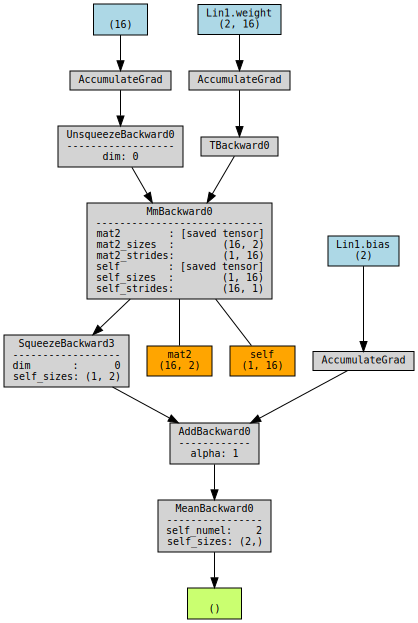

In [26]:
make_dot(model(x).mean(), params=dict(model.named_parameters()), show_attrs=True, show_saved=True)